In [11]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cvx.covariance.iterated_ewma import iterated_ewma, ewma
from cvx.covariance.log_likelihood import log_likelihood

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [12]:
data = pd.read_csv("/Users/kasper/Documents/Stanford/Research/Data/SP500/asset_data_2000_to_2023.csv", index_col=0, parse_dates=True)

data = data.drop(["TICKER", "PERMCO"], axis=1)
prices = pd.pivot_table(data, values='PRC', index='date', columns='PERMNO', fill_value=None)
prices.index = pd.to_datetime(prices.index, format="%Y-%m-%d")
returns = prices.pct_change().dropna(axis=0, how="all")

In [14]:
from cvx.covariance.iterated_ewma import iterated_ewma, ewma
iewma = iterated_ewma(returns.loc[:], vola_halflife=63, cov_halflife=125, min_periods_vola=21, min_periods_cov=250)


In [20]:
r = np.array([1,2,3])
np.diagonal(np.diag(r))

array([1, 2, 3])

In [10]:
(iewma[returns.index[500]]-iewma2[returns.index[500]]).max().sum()

1.4062440990315894e-16

In [30]:
pd.DataFrame.zeros_like(returns)

AttributeError: type object 'DataFrame' has no attribute 'zeros_like'

In [28]:
temp = returns.iloc[:10,:10]

In [29]:
np.linalg.eig(temp)

(array([-0.08487831+0.j        ,  0.03567481+0.06252618j,
         0.03567481-0.06252618j,  0.00565754+0.05058938j,
         0.00565754-0.05058938j, -0.01704801+0.02093535j,
        -0.01704801-0.02093535j, -0.02102589+0.j        ,
         0.05281069+0.00200257j,  0.05281069-0.00200257j]),
 array([[ 0.54722827+0.j        , -0.09093886+0.07855401j,
         -0.09093886-0.07855401j,  0.11542573+0.04217187j,
          0.11542573-0.04217187j, -0.05135016-0.11398781j,
         -0.05135016+0.11398781j, -0.00281288+0.j        ,
          0.2245151 -0.00569826j,  0.2245151 +0.00569826j],
        [-0.09253261+0.j        ,  0.16266078-0.41869277j,
          0.16266078+0.41869277j,  0.06170169-0.3683517j ,
          0.06170169+0.3683517j , -0.18800843+0.27445544j,
         -0.18800843-0.27445544j, -0.26488554+0.j        ,
         -0.66524191+0.j        , -0.66524191-0.j        ],
        [ 0.24373161+0.j        ,  0.47859989+0.j        ,
          0.47859989-0.j        ,  0.13121299+0.39328585j

In [36]:
returns.clip(lower=returns, upper=returns)

PERMNO,10104,10107,10138,10145,10516,11308,11404,11674,11762,11850,...,82775,84381,85348,85631,85913,85914,85926,86136,87055,92655
date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.088360,-0.033780,-0.030249,-0.017641,-0.010417,-0.008869,0.012963,0.002079,-0.034151,-0.017586,...,-0.033149,-0.036709,-0.020101,-0.048689,-0.006148,-0.002174,0.038323,0.010830,-0.054775,-0.012791
2000-01-05,-0.052815,0.010544,-0.001835,-0.013468,-0.015789,0.019016,0.045704,0.031120,0.008160,0.054516,...,-0.030000,0.005256,0.005128,-0.062992,0.016495,-0.023965,0.000000,0.021429,0.017088,-0.002356
2000-01-06,-0.058824,-0.033498,0.029412,0.019340,0.005348,0.001098,0.001748,-0.004024,0.020683,0.049383,...,0.008837,-0.016993,-0.008503,-0.060924,0.014199,0.015625,0.026528,0.027972,0.020088,0.036600
2000-01-07,0.076823,0.013068,-0.007143,0.053571,0.015957,0.065789,0.006981,0.010101,0.030837,-0.000735,...,0.046715,0.027926,-0.022298,0.118568,0.028000,0.024176,0.035955,-0.020408,0.066237,0.117312
2000-01-10,0.119710,0.007291,0.010791,0.005297,0.000000,-0.031893,-0.025997,0.006000,-0.025641,-0.013981,...,-0.016736,0.000000,0.040351,-0.012000,0.052529,-0.010730,0.029284,-0.010417,0.020819,-0.017329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.004473,0.002267,0.007617,0.007348,0.012087,0.007578,0.007251,0.015332,0.004420,0.026445,...,0.009950,0.003008,0.000621,0.000319,0.009238,0.011061,0.009905,0.004521,0.008589,0.008006
2022-12-27,0.001608,-0.007414,-0.003510,0.004769,0.013633,0.006111,0.007303,0.005821,0.003444,0.013894,...,0.006305,0.003155,0.007758,-0.009938,-0.001548,0.006269,0.002002,0.006910,-0.008970,0.001280
2022-12-28,-0.008027,-0.010255,-0.023932,-0.012565,-0.023877,-0.009967,-0.006007,-0.008471,-0.010106,-0.016426,...,-0.012139,-0.009163,-0.004542,-0.023565,-0.018537,-0.020645,-0.021374,-0.015865,-0.012017,-0.006654


In [32]:
from cvx.covariance.ewma import iterated_ewma

iewma2 = iterated_ewma(returns.loc[:], vola_halflife=63, cov_halflife=125, min_periods_vola=21, min_periods_cov=250)

In [54]:
iewma_no_clip = iterated_ewma(returns.loc['2010-01-01':], vola_halflife=63, cov_halflife=125, min_periods_vola=21, min_periods_cov=250)

iewma_clip = iterated_ewma(returns.loc['2010-01-01':], vola_halflife=63, cov_halflife=125, min_periods_vola=21, min_periods_cov=250, clip_at=3)

iewma_reg = iterated_ewma(returns.loc['2010-01-01':], vola_halflife=63, cov_halflife=123, min_periods_vola=21, min_periods_cov=250, low_rank=50)

iewma_clip_reg = iterated_ewma(returns.loc['2010-01-01':], vola_halflife=63, cov_halflife=123, min_periods_vola=21, min_periods_cov=250, low_rank=50, clip_at=3)


In [27]:
# Prescient predictor
prescient = {}
for t in returns.index:
    # get sample covariance matrix for corresponding year
    year = t.year
    cov = np.cov(returns.loc[returns.index.year == year].values, rowvar=False)
    prescient[t] = pd.DataFrame(cov, index=returns.columns, columns=returns.columns)

# Log-likelihoods

In [38]:
predictors = [iewma_no_clip, iewma_clip, iewma_reg, iewma_clip_reg, prescient]

ll = {}

names = ["No clipping", "Clip at 3 sigma", "Low rank 50" "Clip at 3 sigma, low rank 50", "Prescient"]

for i, predictor in enumerate(predictors):
    print("Computing " + names[i] + " log-likelihood...")
    returns_temp = returns.loc[pd.Series(predictor).index].values[1:]
    times = pd.Series(predictor).index[1:]
    Sigmas_temp = np.stack([predictor[t].values for t in predictor.keys()])[:-1]

    ll[names[i]] = pd.Series(log_likelihood(returns_temp*100, Sigmas_temp*10000), index=times)

Computing No clipping log-likelihood...
Computing Clip at 3 sigma log-likelihood...
Computing Clip at 3 sigma, low rank 50 log-likelihood...
Computing Prescient log-likelihood...



No clipping
591.923 2002.672 13632.818

Clip at 3 sigma
639.834 2046.641 13916.908

Clip at 3 sigma, low rank 50
452.16 1217.32 8000.404

Prescient
0.0 0.0 0.0

Low rank (no clipping)
404.218 1146.903 7525.876


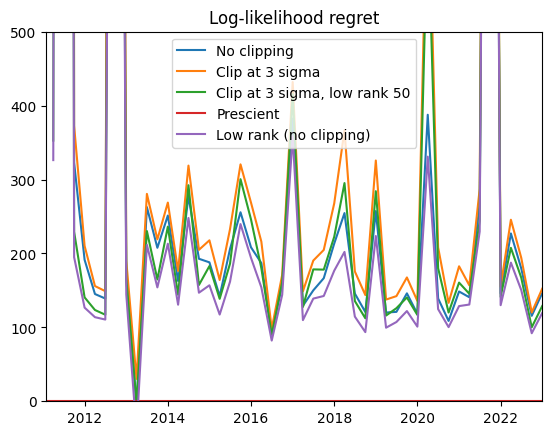

In [59]:
for i, name in enumerate(ll):
    regret = (ll["Prescient"] - ll[name]).resample("Q").mean()
    plt.plot(regret, label=name)

    print("\n" + name)
    print(np.round(regret.mean(),3), np.round(regret.std(),3), np.round(regret.max(),3))
plt.legend()
plt.title("Log-likelihood regret")
plt.ylim(0,500)
plt.xlim([*predictors[0].keys()][0], returns.index[-1]);

In [31]:
names[i]

'No clipping'

In [28]:
predictor = prescient
print("Computing " + names[i] + " log-likelihood...")
returns_temp = returns.loc[pd.Series(predictor).index].values[1:]
times = pd.Series(predictor).index[1:]
Sigmas_temp = np.stack([predictor[t].values for t in predictor.keys()])[:-1]

ll[names[i]] = log_likelihood(returns_temp*100, Sigmas_temp*10000)

Computing Prescient log-likelihood...


In [ ]:
r_temp = returns.loc[pd.Series(iewma).index].values[1:]
times = pd.Series(iewma).index[1:]
Sigmas_temp = np.stack([iewma[t].values for t in iewma.keys()])[:-1]

ll = log_likelihood(r_temp*100, Sigmas_temp*10000, means=None)
ll = pd.Series(ll, index=times)